In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

## QNN

In [2]:
backend = Aer.get_backend('qasm_simulator')

In [3]:
n = 40
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

y_deriv_num = (y[1:] - y[:-1])/(x[1]-x[0])

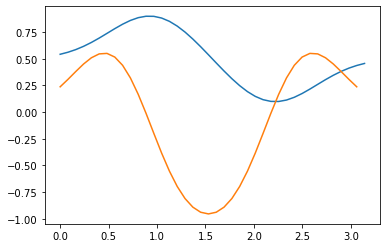

In [4]:
plt.plot(x, y)
plt.plot(x[:-1], y_deriv_num)
plt.show()

In [6]:
np.random.seed(42)

qnn = sequential_qnn(n_qubits = [1, 3, 3],
                     dim = [1, 3, 3, 1],
                     encoder = Encoder(),
                     ansatz=Ansatz(reps=2),
                     backend=backend,
                     shots=10000)

qnn.train(x, y, epochs=100, verbose=True)
    

saver(qnn, data_path("qnn_deriv"))

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1339475036962719
epoch: 1, loss: 0.10181997862410337
epoch: 2, loss: 0.06077699894071655
epoch: 3, loss: 0.0562133452116512
epoch: 4, loss: 0.04828124410205679
epoch: 5, loss: 0.03522184304088684
epoch: 6, loss: 0.029737045067034486
epoch: 7, loss: 0.028793172218476604
epoch: 8, loss: 0.03025456870361997
epoch: 9, loss: 0.02659153405942295
epoch: 10, loss: 0.022679643909687942
epoch: 11, loss: 0.020807130982997232
epoch: 12, loss: 0.018271260500993113
epoch: 13, loss: 0.014992045515976988
epoch: 14, loss: 0.011480764347591457
epoch: 15, loss: 0.008345628726749701
epoch: 16, loss: 0.006235649516166019
epoch: 17, loss: 0.00551640740828333
epoch: 18, loss: 0.006553168750700014
epoch: 19, loss: 0.008342092175682075
epoch: 20, loss: 0.007562257366863986
epoch: 21, loss: 0.005678845538657073
epoch: 22, loss: 0.005980803246667997
epoch: 23, loss: 0.004994544324631078
epoch: 24, loss: 0.004405117559013803
epoch: 25, loss: 0.0028942486830276426
epoch: 26, loss: 0.0025835225367

In [7]:
y_pred = qnn.predict(x)
y_deriv = qnn.deriv(x)

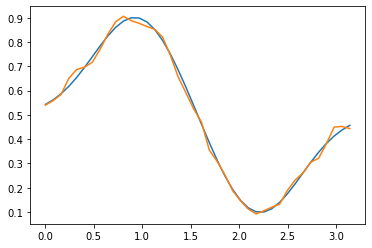

In [8]:
plt.plot(x, y)
plt.plot(x, y_pred)
plt.show()

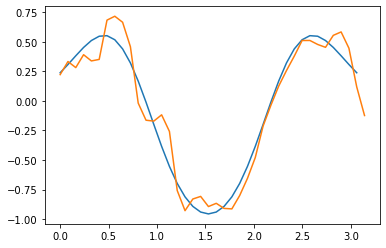

In [9]:
plt.plot(x[:-1], y_deriv_num)
plt.plot(x, y_deriv)
plt.show()

In [10]:
np.random.seed(42)

dnn = sequential_dnn(dim = [1, 5, 5, 1], scale = [1.5, 1.5, 1.5], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)
    

saver(dnn, data_path("dnn_deriv"))

TypeError: sequential_dnn() got an unexpected keyword argument 'lr'

In [ ]:
y_pred = dnn.predict(x)
y_deriv = dnn.deriv(x)

In [ ]:
plt.plot(x, y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
plt.plot(x[:-1], y_deriv_num)
plt.plot(x, y_deriv)
plt.show()